In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mpl_defaults
import matplotlib as mpl
import matplotlib.transforms as transform
import scipy
%matplotlib widget

In [2]:
dfgap = pd.read_csv('datafiles/PerpGap.csv', )
dfgap.columns

Index(['z', 'gap'], dtype='object')

array([1.00049562, 1.05683019])

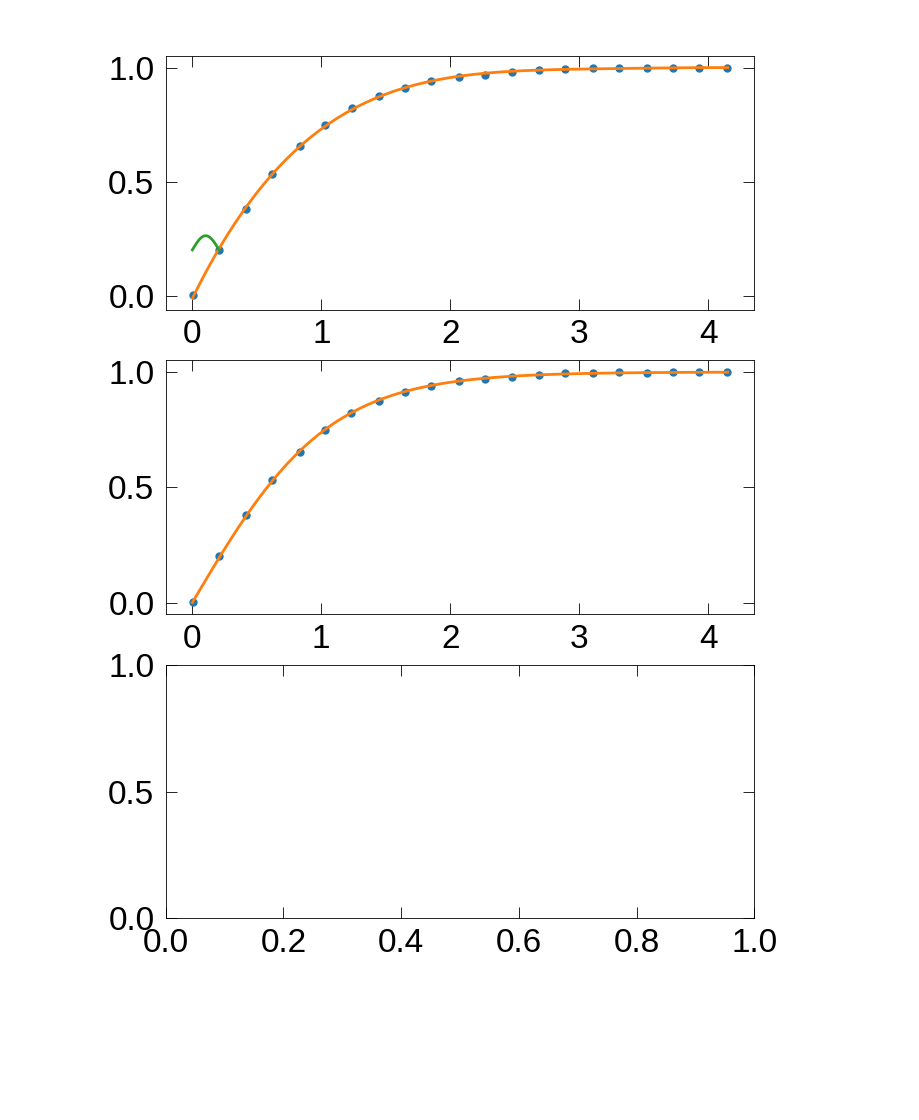

In [3]:
fig, ax = plt.subplots(3,1, figsize = (9.2, 2*5.6))
axa, axb, axc = ax
axa.plot(dfgap['z'], dfgap['gap'],'o', markersize = 5)



gap_params = np.polyfit(dfgap['z'], dfgap['gap'], deg =4)

zfit = np.linspace(1E-3, 4.15, 1000)
gapfit = np.polyval(gap_params, zfit)
axa.plot(zfit, gapfit)

z = dfgap.z
gap = dfgap.gap


axa.set_xbound(0)
axa.set_ybound(0)

def abs_levels(n, z, gap):
    idx = np.floor(2*n-1)
    zstop = z[idx]
    yoff = gap[idx]
    zn = np.linspace(0, zstop, 100)
    En = np.sin(n*np.pi/zstop*zn)*np.sqrt(2/zstop)/50 + yoff
    return [zn, En]

zn, En = abs_levels(1, z, gap)
axa.plot(zn, En)
# axb.plot(np.log(zfit), np.log(gapfit))
logz = np.log(dfgap['z'])
logd = np.log(dfgap['gap'])


def rc_charge(x, A, tau):
    return A*(1-np.exp(x/tau))

def tanh_func(x, A, tau):
    return A*np.tanh(x/tau)

from scipy.optimize import curve_fit
axb.plot(z, gap, 'o', markersize = 5)


p0 = [1,1]
popt, pcov = curve_fit(tanh_func, dfgap['z'], dfgap['gap'], p0)
axb.plot(zfit, tanh_func(zfit, *popt))
# logz_fit = np.log(zfit)
# params = np.polyfit(logz, logd, deg = 5)
# logd_fit = np.polyval(params, logz_fit,)
# # axb.plot(logz_fit, logd_fit)
# axc.plot(np.exp(logz_fit), np.exp(logd_fit))
popt

In [4]:
fig.dpi_scale_trans

/tmp/ipykernel_20459/1358692789.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("Reds_r", 7)


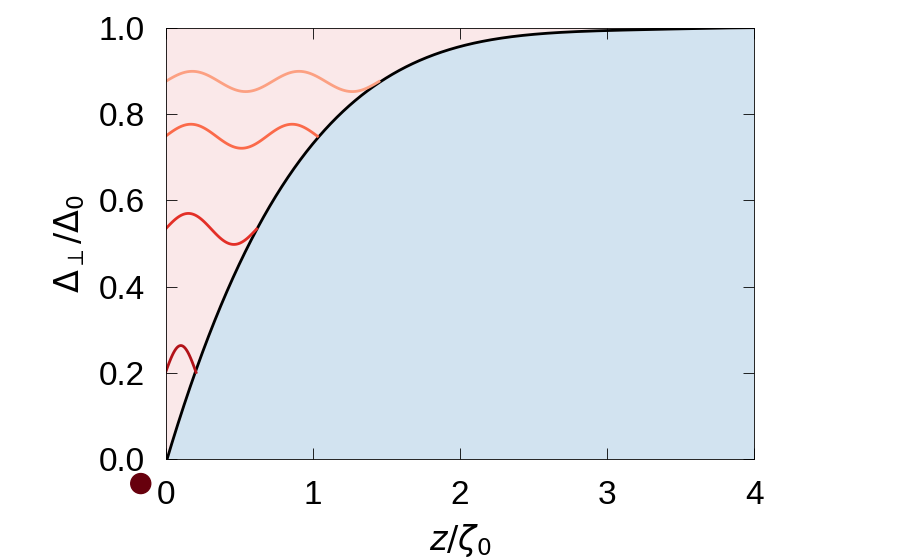

In [5]:
fig_absLevels, axa = plt.subplots(1,1, figsize = (9.2,5.6),)

cmap = mpl.cm.get_cmap("Reds_r", 7)
colors = cmap(np.arange(5))

axa.plot(zfit, gapfit, 'k')
# axa.hlines(y = 1, xmin = 0, xmax = 4, color='k', linestyles = '--')
axa.set_xbound(0)

for n in np.arange(4):
    zn, En = abs_levels(n+1, dfgap['z'], dfgap['gap'])
    axa.plot(zn, En, color = colors[n+1])


# axa.plot(0, 0, 'o', markersize = 20)
# axa.vlines( 0, 0, 1, color = 'k')
axa.fill_between(zfit, 0, gapfit, alpha = 0.2)
axa.fill_between(zfit, gapfit, 1, alpha = 0.1, color ='tab:red')
axa.set_xbound(0, 4,)
axa.set_ybound(0, upper = 1.0)
axa.set_xlabel(r'$z/\zeta_0$',)
axa.set_ylabel(r'$\Delta_{\perp}/\Delta_0$')
axa.tick_params(axis = 'both' , which = 'major', pad = 15)

trans = (fig.dpi_scale_trans +transform.ScaledTranslation(zfit[0], gapfit[0], axa.transData))
maj = patches.Circle((-1/4, -1/5), radius = 0.1, color = colors[0], clip_on = False, transform = trans)
# maj = patches.Circle((-1/4*2, -1/5*2), radius = 0.1, color = colors[0], clip_on = False, transform = trans)

fig_absLevels.subplots_adjust()
axa.add_patch(maj)
plt.draw()
# fig_absLevels.savefig('figures/ABS levels.pdf',)
# fig_absLevels.savefig('figures/ABS levels.svg')
# fig_absLevels.savefig('figures/ABS levels.png')

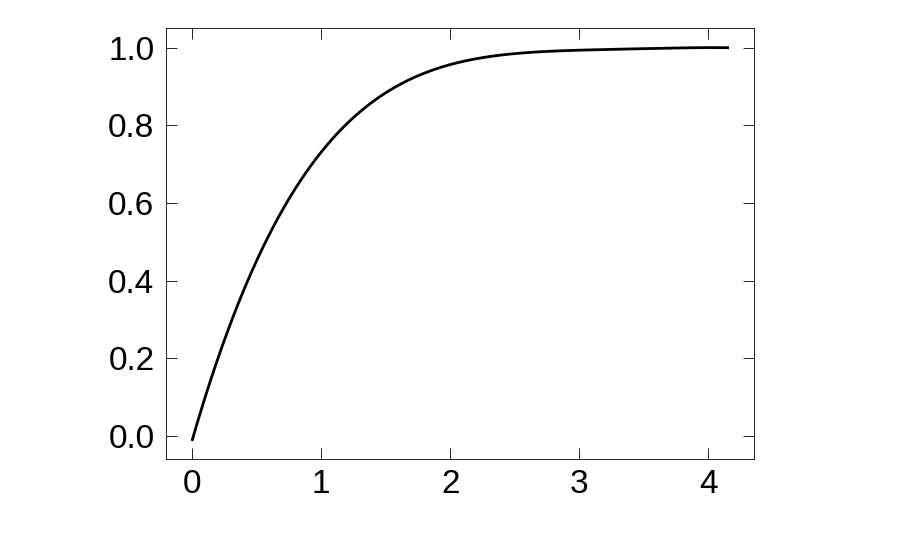

In [6]:
fig, axa = plt.subplots(1,1)

axa.plot(zfit, gapfit, 'k')


In [7]:
fig.dpi_scale_trans.get_affine

<bound method AffineBase.get_affine of <matplotlib.transforms.Affine2D object at 0x7f1fc530f590>>

# Bound state spectra solution

In [8]:
from scipy.integrate import odeint

## Square well numerical solutions

Some helpful links:

https://blog.cupcakephysics.com/computational%20physics/2014/11/02/the-finite-difference-method-and-schrodingers-equation.html

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.03-Finite-Difference-Method.html

In [9]:
# #### SQUARE WELL #####
# n = 1000
# K_mat = np.zeros((n, n))
# V_mat = np.zeros((n, n))
# x = np.linspace(0, 50, n)

# hbar = 1
# mass = 1
# step_size = np.diff(x).mean()
# alpha = -1*hbar**2/(2*mass*step_size**2)

# K_mat[0,0] =-2
# K_mat[n-1, n-1] = -2
# for i in range (1, n-1):
#     K_mat[i, i-1] = 1
#     K_mat[i, i] = -2
#     K_mat[i, i+1] = 1
#     # if i >0: #FOR PERIODIC BC, COMMENT THIS CONDITIONAL; OFF DIAGONAL 1 IS NEEDED FOR PBC
#     #     K[i-1, i] = 1
# K_mat = K_mat*alpha
# # print(K_mat)

# V = np.zeros((n))
# V[0:int(0.4*n)] = 1
# V[int(0.4*n):int(0.6*n)] = 0.1
# V[int(0.6*n):] = 1

# np.fill_diagonal(V_mat, V)
# # print(V_mat)

# # print(step_size)

# H_mat = K_mat + V_mat
# # H_mat = H_mat[1:n, 1:n]
# E_states, psi = np.linalg.eigh(H_mat)
# print(np.sort(E_states)[0:7])

# plt.figure()
# plt.plot(E_states[0:4], 'o', markersize = 10)


In [10]:
import normal_He3_params as he3

Text(0, 0.5, '$T_F/T_c$')

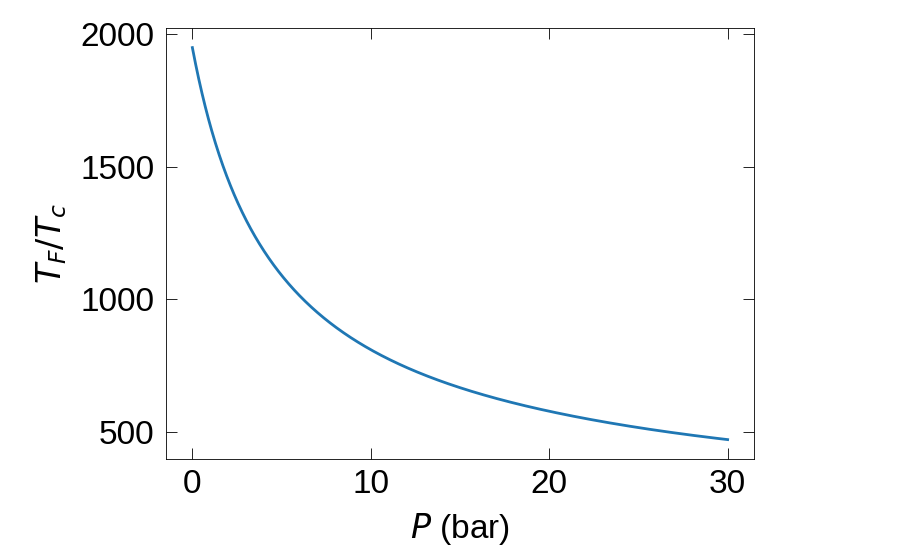

In [11]:
fig, ax = plt.subplots()

P = np.linspace(0, 30, 1000)
Tfermi = he3.T_Fermi(P)
Tc = he3.Tc_line(P)*1E-3

ax.plot(P, Tfermi/Tc)
ax.set_xlabel(r'$P$ (bar)')
ax.set_ylabel(r'$T_F/T_c$')

In [12]:
def d2dx2(num, dx):
    mat = np.zeros((num+1, num+1))
    for i in range(num):
        mat[i, i] = -2
        try:
            mat[i, i-1] = 1
            mat[i, i+1] = 1
        except:pass
    return mat[0:num, 0:num]/dx**2

def ddx(num, dx):
    mat = np.zeros((num+1, num+1))
    for i in range(num):
        try:
            mat[i, i-1] = -1
            mat[i, i+1] = 1
        except:pass
    return mat[0:num, 0:num]/dx

In [15]:
## P-WAVE

n = 1000
# K_mat = np.zeros((n, n))
V_mat = np.zeros((n, n))
z = np.linspace(0, 4, n)

hbar = 1#1.055E-34
mass = 1#6.646E-27
step_size = np.diff(z)[1]

# K_mat[0,0] =-2
# K_mat[n-1, n-1] = -2
# for i in range (1, n-1):
#     K_mat[i, i-1] = 1
#     K_mat[i, i] = -2
#     K_mat[i, i+1] = 1
#     # if i >0: #FOR PERIODIC BC, COMMENT THIS CONDITIONAL; OFF DIAGONAL 1 IS NEEDED FOR PBC
#     #     K[i-1, i] = 1
# K_mat = K_mat/step_size**2
K_mat = d2dx2(n, dx = z.max()/(n+1))

np.fill_diagonal(V_mat, np.tanh(z))

P = 2
constant = 4*2/(np.pi**2*3.52)*he3.T_Fermi(P)*1E3/he3.Tc_line(P)
H_mat = -1*K_mat/constant + V_mat
# H_mat = H_mat[1:n, 1:n]
# eigval, psi = np.linalg.eigh(H_mat)
eigval, psi = scipy.linalg.eigh(H_mat)

print(np.sort(eigval)[0:7])

# plt.figure()
# plt.plot(eigval[0:4], 'o-', markersize = 10)



[0.32728745 0.55494882 0.71693344 0.83521295 0.9184247  0.97125586
 0.99744633]


In [16]:
# fig, ax = plt.subplots(1,1)
# for i in range(4):
#     ax.plot(z, eigval[i] + 10*psi[:, i]*np.conjugate(psi[:, i]))

# ax.set_xlabel(r'$z/\zeta_0$')
# ax.set_ylabel(r'$|\psi|^2$')

/tmp/ipykernel_20459/3573518486.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("Reds_r", 7)


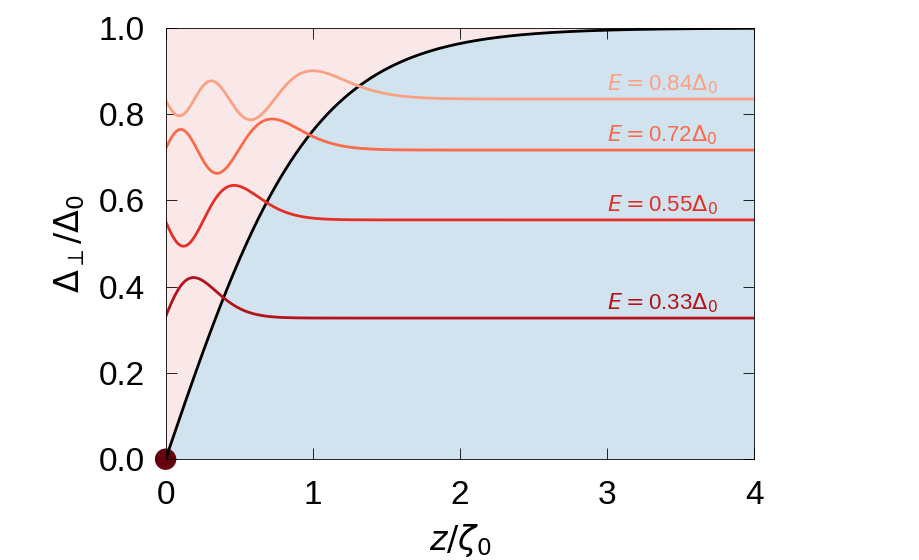

In [17]:
fig_absLevels, axa = plt.subplots(1,1, figsize = (9.2,5.6),)

cmap = mpl.cm.get_cmap("Reds_r", 7)
colors = cmap(np.arange(6))

axa.plot(z, np.tanh(z), 'k')
# axa.hlines(y = 1, xmin = 0, xmax = 4, color='k', linestyles = '--')
axa.set_xbound(0)

for n in np.arange(4):

    En = eigval[n]
    axa.plot(z, psi[:, n]*0.75 + eigval[n], color = colors[n+1])
    axa.text(
        x=3, y= eigval[n]+0.02, 
        s=r'$E=$'+ '{:.2f}'.format(En)+r'$\Delta_0$', 
        fontsize = 16, color = colors[n+1]
    )

axa.fill_between(z, 0, np.tanh(z), alpha = 0.2)
axa.fill_between(z, np.tanh(z), 1, alpha = 0.1, color ='tab:red')
axa.set_xbound(0, 4,)
axa.set_ybound(0, upper = 1.0)
axa.set_xlabel(r'$z/\zeta_0$',)
axa.set_ylabel(r'$\Delta_{\perp}/\Delta_0$')
axa.tick_params(axis = 'both' , which = 'major', pad = 15)


trans = (fig.dpi_scale_trans +transform.ScaledTranslation(0,0, axa.transData))
maj = patches.Circle((-1/4, -1/5), radius = 0.1, color = colors[0], clip_on = False, transform = trans)
# maj = patches.Circle((-1/4*2, -1/5*2), radius = 0.1, color = colors[0], clip_on = False, transform = trans)
maj = patches.Circle((0, 0), radius = 0.1, color = colors[0], clip_on = False, transform = trans)

fig_absLevels.subplots_adjust()
axa.add_patch(maj)
plt.draw()
fig_absLevels.savefig('figures/ABS levels.pdf',)
fig_absLevels.savefig('figures/ABS levels.svg')
fig_absLevels.savefig('figures/ABS levels.png')

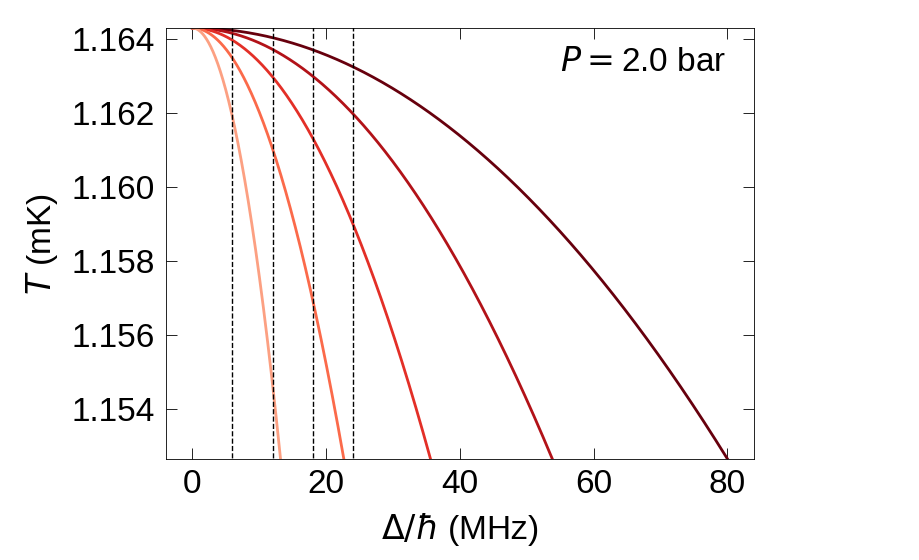

In [18]:
gap_freq = 460 #MHz
eigval[0:4]*gap_freq
fig, ax = plt.subplots()
Tc = he3.Tc_line(P)
redT = np.linspace(0.99, 1, 1000)
for i in range(5):
    if i == 0:
        exit_E = 1
    else:
        exit_E = 1-eigval[i-1]
    gap_f = exit_E*gap_freq*1.74*(1-redT)**0.5

    # ax.plot(redT*Tc, gap_f, color = colors[i])
    ax.plot(gap_f, redT*Tc,  color = colors[i])

# ax.plot(redT, gap_f)
ax.vlines([6, 12, 18, 24], 0.9*Tc, 1.2*Tc, color = 'k', linestyle = '--', linewidth = 1)

ax.set_ylabel(r'$T$ (mK)')
ax.set_xlabel(r'$\Delta/\hbar$ (MHz)')
ax.text(s=r'$P=$'+'{:.1f} bar'.format(P), x = 55, y = 0.999*Tc )
ax.set_ybound(0.99*Tc, 1.*Tc)


# Bogoliubov deGennes 